# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install openweathermapy

  Created wheel for openweathermapy: filename=openweathermapy-0.6.6-cp37-none-any.whl size=6352 sha256=cd57b29dc95ea61ee4beb55eb39b5b55d22008f342b857507f15a351505bce49
  Stored in directory: C:\Users\adler\AppData\Local\pip\Cache\wheels\c4\1d\0d\1a3bfa432ec120fcc8d8dcf316bc17b1e779fcbfb17e78a2ec
Successfully built openweathermapy
Note: you may need to restart the kernel to use updated packages.


In [3]:
from geopy.geocoders import Nominatim

In [8]:
from citipy import citipy
city = citipy.nearest_city(42.0730 , -87.7509)
city

city.city_name     # Wilmette, my home town


#city.country_code
                  # And the country is surely US

'wilmette'

In [20]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import openweathermapy as ow
from pprint import pprint
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90 , 90 )
lng_range = (-180 , 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90, high=90, size=500)
lngs = np.random.uniform(low=-180, high=180, size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities

['ornskoldsvik',
 'mukhen',
 'hithadhoo',
 'kikwit',
 'vao',
 'georgetown',
 'taolanaro',
 'hobart',
 'port elizabeth',
 'tasiilaq',
 'barentsburg',
 'yellowknife',
 'kavieng',
 'hasaki',
 'bredasdorp',
 'bluff',
 'may pen',
 'gidam',
 'canico',
 'samusu',
 'busselton',
 'rikitea',
 'vaini',
 'ahipara',
 'kodiak',
 'sao filipe',
 'barrow',
 'attawapiskat',
 'ushuaia',
 'qaanaaq',
 'mala vyska',
 'guatire',
 'belushya guba',
 'avarua',
 'guerrero negro',
 'lavrentiya',
 'kapaa',
 'kaitangata',
 'makakilo city',
 'hay river',
 'castro',
 'comodoro rivadavia',
 'nikolskoye',
 'gizo',
 'noyabrsk',
 'pedro ii',
 'langres',
 'luderitz',
 'bengkulu',
 'tukrah',
 'sorland',
 'jamame',
 'palauig',
 'urengoy',
 'cidreira',
 'souillac',
 'khatanga',
 'namibe',
 'mar del plata',
 'penzance',
 'arraial do cabo',
 'khonuu',
 'tucuman',
 'muzhi',
 'cape town',
 'jakar',
 'raudeberg',
 'jieshi',
 'mataura',
 'campina verde',
 'nanortalik',
 'cherskiy',
 'omutinskoye',
 'punta arenas',
 'illoqqortoormi

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [12]:
record_counter = 1
set_counter = 1
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
        time.sleep(10)

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    #print(url)
    try:
        
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
        
    except:
        
        print(response)

------------------------
Beginning Data Retrieval
------------------------
Processing record 2 of set 1 | ornskoldsvik
Processing record 3 of set 1 | mukhen
Processing record 4 of set 1 | hithadhoo
Processing record 5 of set 1 | kikwit
Processing record 6 of set 1 | vao
Processing record 7 of set 1 | georgetown
Processing record 8 of set 1 | taolanaro
{'cod': '404', 'message': 'city not found'}
Processing record 9 of set 1 | hobart
Processing record 10 of set 1 | port elizabeth
Processing record 11 of set 1 | tasiilaq
Processing record 12 of set 1 | barentsburg
{'cod': '404', 'message': 'city not found'}
Processing record 13 of set 1 | yellowknife
Processing record 14 of set 1 | kavieng
Processing record 15 of set 1 | hasaki
Processing record 16 of set 1 | bredasdorp
Processing record 17 of set 1 | bluff
Processing record 18 of set 1 | may pen
Processing record 19 of set 1 | gidam
Processing record 20 of set 1 | canico
Processing record 21 of set 1 | samusu
{'cod': '404', 'message': 'c

Processing record 28 of set 4 | pudozh
Processing record 29 of set 4 | kaeo
Processing record 30 of set 4 | kosonsoy
Processing record 31 of set 4 | torbay
Processing record 32 of set 4 | rungata
{'cod': '404', 'message': 'city not found'}
Processing record 33 of set 4 | gamba
Processing record 34 of set 4 | bathsheba
Processing record 35 of set 4 | tomatlan
Processing record 36 of set 4 | pacific grove
Processing record 37 of set 4 | dubovskoye
Processing record 38 of set 4 | ducheng
Processing record 39 of set 4 | narsaq
Processing record 40 of set 4 | hauterive
Processing record 41 of set 4 | shu
Processing record 42 of set 4 | saldanha
Processing record 43 of set 4 | xuanzhou
Processing record 44 of set 4 | wodonga
Processing record 45 of set 4 | shelopugino
Processing record 46 of set 4 | mata
Processing record 47 of set 4 | praia da vitoria
Processing record 48 of set 4 | batagay-alyta
Processing record 49 of set 4 | tura
Processing record 50 of set 4 | kovdor
Processing record 0

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed

weather_data = pd.DataFrame({
    
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
})

weather_data.count()

City          253
Cloudiness    253
Country       253
Date          253
Humidity      253
Temp          253
Lat           253
Lng           253
Wind Speed    253
dtype: int64

In [14]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,ornskoldsvik,100,SE,1586638201,93,35.60,63.29,18.72,6.93
1,mukhen,0,RU,1586638201,75,32.27,48.10,136.10,4.92
2,hithadhoo,0,MV,1586638081,65,84.56,-0.60,73.08,6.38
3,kikwit,76,CD,1586638201,78,73.67,-5.04,18.82,1.12
4,vao,27,NC,1586638127,74,76.19,-22.67,167.48,15.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [21]:
cities_list = zip(new_cities,cloudiness,country,date,humidity,temp,lat,lng)
# Set variable for output file
output_file = os.path.join('..', 'output_data', 'cities.csv')
#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

In [22]:
date =datetime.datetime.fromtimestamp(
        int(weather_data['Date'][0])
    ).strftime('%m/%d/%Y')

#### Latitude vs. Temperature Plot

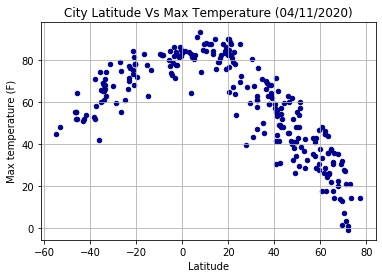

In [23]:
# Latitude Vs Temperature Plot

weather_data.plot(kind='scatter', x='Lat', y='Temp', c='DarkBlue')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("../Images/LatitudeVsTemperature.png")

#### Latitude vs. Humidity Plot

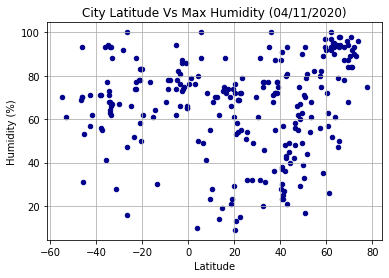

In [24]:
# Latitude Vs Humidity

weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../Images/LatitudeVsHumidity.png")

#### Latitude vs. Cloudiness Plot

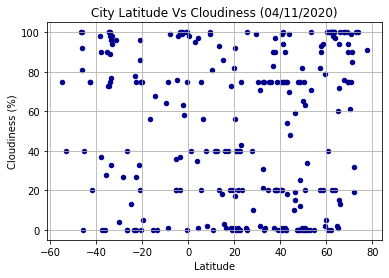

In [25]:
# Latitude Vs Cloudiness

weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../Images/LatitudeVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

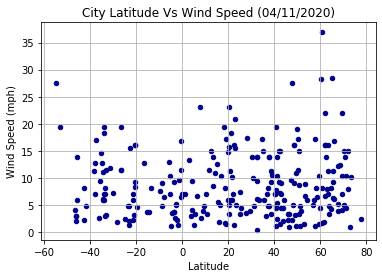

In [26]:
# Latitude Vs Wind Speed

weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../Images/LatitudeVsWindSpeed.png")

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression